# Step 1: Exploratory Data Analysis (EDA)

Data Overview

| Column Name         | Description                                                                                     |
|---------------------|-------------------------------------------------------------------------------------------------|
| Booking_ID | Unique identifier for each booking.                                                               |
| number of adults           | The count of adult guests in the booking.                                                                              |
| number of children         |The count of child guests in the booking.                                                                            |
| number of weekend nights       | The number of nights during the weekend (typically Friday and Saturday nights).                                             |
| number of week nights             | The number of nights during the weekdays (Sunday through Thursday nights).                         |
| type of meal   | The meal plan included in the booking.                      |
| car parking space                 | Whether the booking includes a parking space for a car.                                                            |
| room type         | The type of room booked.                                                          |
| lead time     | Number of days that elapsed between date of the booking into the PMS and the arrival date                                                           |
| market segment type    | The market segment the booking belongs to                                                   |
| repeated     | Indicates whether the booking is a repeat booking.                                                    |
| P-C   | Probability of Cancelation - The likelihood that the booking will be canceled.                                                  |
| P-not-C    | Probability of Not Cancelation - The likelihood that the booking will not be canceled.                                                   |
| average price      | The average price per night for the booking.                                                              |
| special requests                | Any additional requests or requirements made by the guest.                                                         |
| date of reservation                 | Date when the booking was made.                                                        |
| booking status               | The current status of the booking (e.g., confirmed, canceled, pending).                                                                   |


Importing libraries

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats

# Data importing
# from google.colab import drive

%matplotlib inline

In [2]:
# # Mount google drive:
# drive.mount('/content/drive')

In [3]:
# Load dataset:
# df = pd.read_csv("/content/drive/MyDrive/first inten project.csv")
# df = pd.read_csv("/content/first inten project.csv")

df = pd.read_csv("first inten project.csv")

In [4]:
#1. Data Inspection:
df

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled


In [5]:
#2. Summary Statistics:
# summary for numerical values
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [6]:
# summary for categorical values
df.describe(include=['object'])

,Booking_ID,type of meal,room type,market segment type,date of reservation,booking status
count,36285,36285,36285,36285,36285,36285
unique,36285,4,7,5,553,2
top,INN00001,Meal Plan 1,Room_Type 1,Online,10/13/2018,Not_Canceled
freq,1,27842,28138,23221,254,24396


In [7]:
# datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [8]:
# cancelled vs non-cancelled bookings
df['booking status'].value_counts()

booking status
Not_Canceled    24396
Canceled        11889
Name: count, dtype: int64

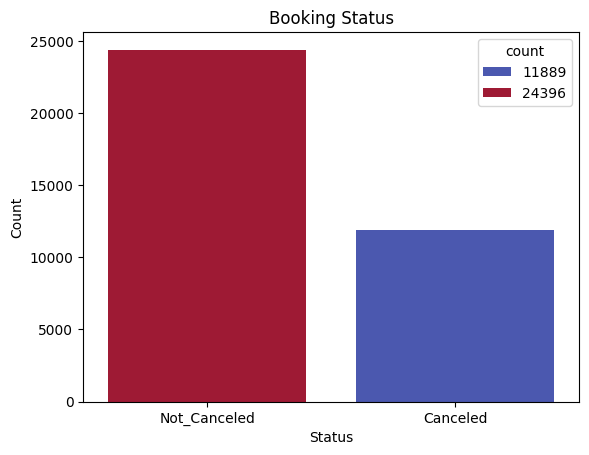

In [9]:
sns.barplot(x=df['booking status'].value_counts().index, y=df['booking status'].value_counts(),palette='coolwarm',hue=df['booking status'].value_counts())
plt.title('Booking Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

In [10]:
# Handling Missing Values:

# Count missing values (is N/A?)
df.isna().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

No missing values found therefore no handling needs to be done.

> Add blockquote



C:\Users\youss\AppData\Local\Temp\ipykernel_20620\3583508224.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[column], palette='rainbow', orient='h')


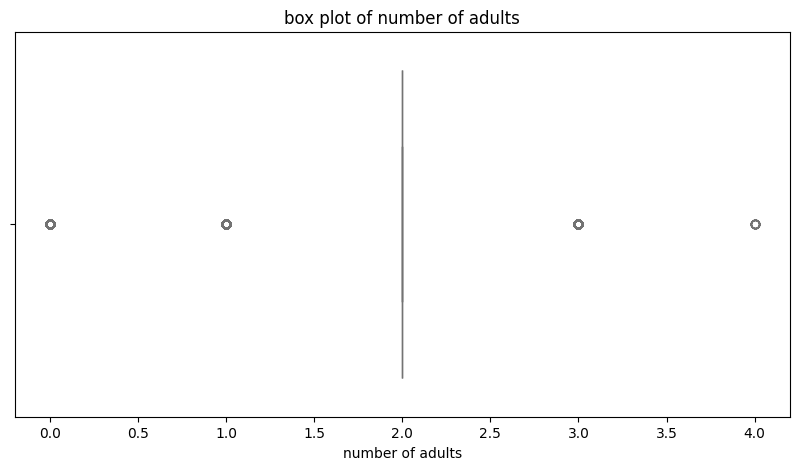

C:\Users\youss\AppData\Local\Temp\ipykernel_20620\3583508224.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[column], palette='rainbow', orient='h')


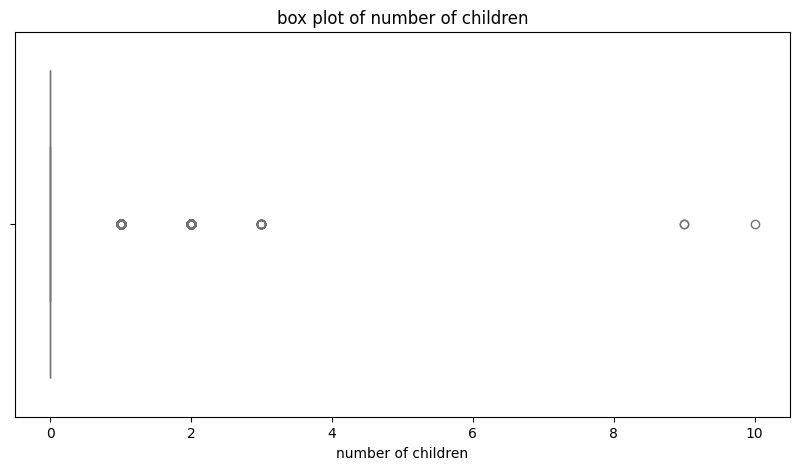

C:\Users\youss\AppData\Local\Temp\ipykernel_20620\3583508224.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[column], palette='rainbow', orient='h')


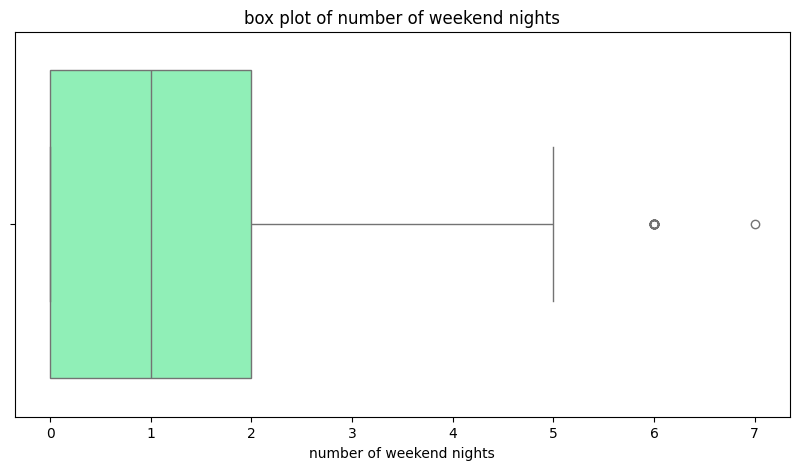

C:\Users\youss\AppData\Local\Temp\ipykernel_20620\3583508224.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[column], palette='rainbow', orient='h')


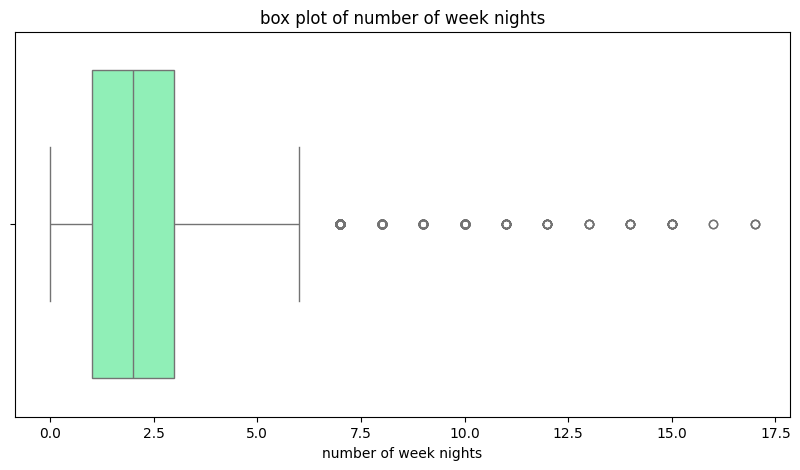

C:\Users\youss\AppData\Local\Temp\ipykernel_20620\3583508224.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[column], palette='rainbow', orient='h')


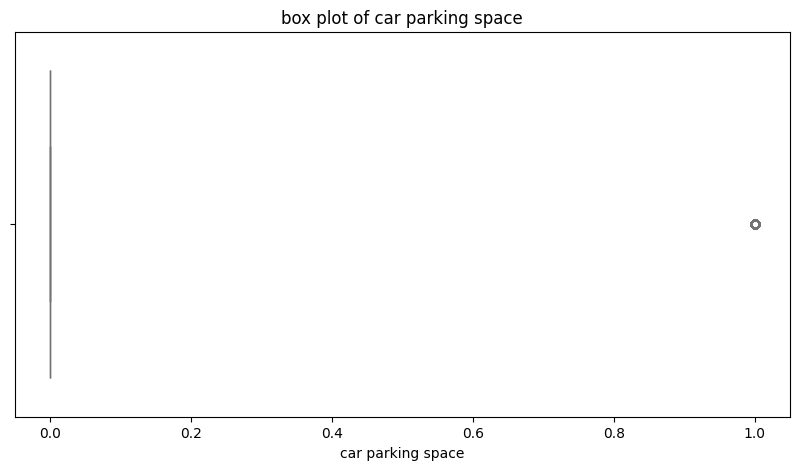

C:\Users\youss\AppData\Local\Temp\ipykernel_20620\3583508224.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[column], palette='rainbow', orient='h')


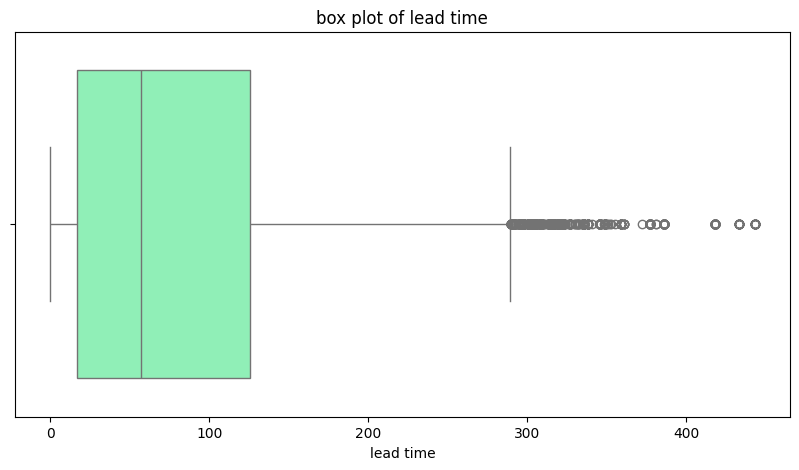

C:\Users\youss\AppData\Local\Temp\ipykernel_20620\3583508224.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[column], palette='rainbow', orient='h')


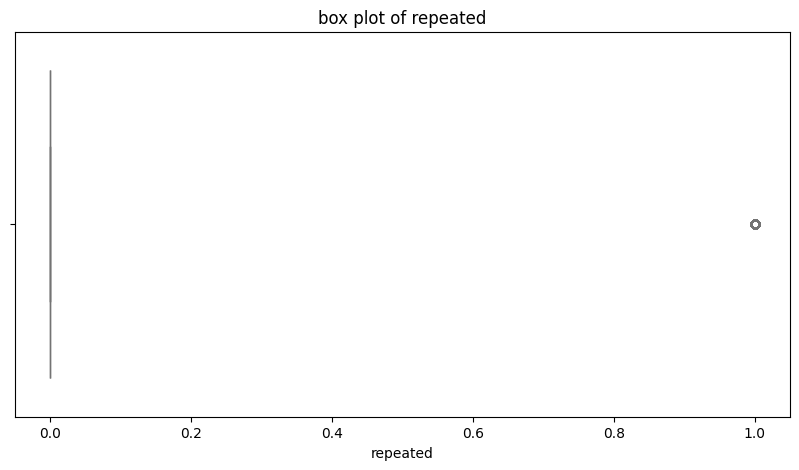

C:\Users\youss\AppData\Local\Temp\ipykernel_20620\3583508224.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[column], palette='rainbow', orient='h')


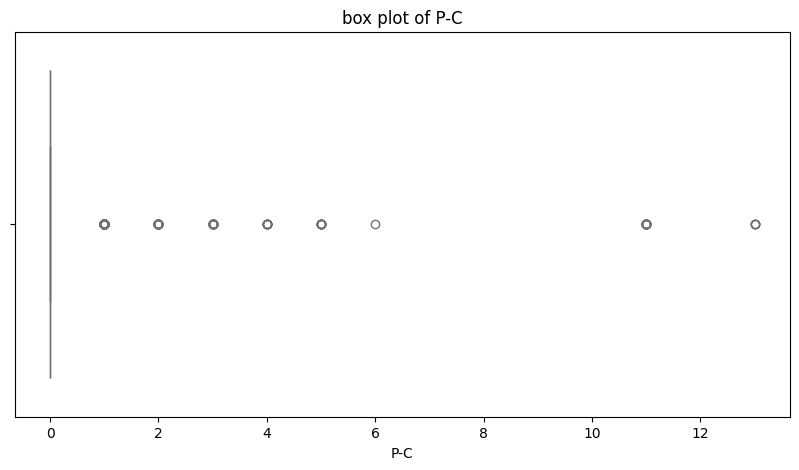

C:\Users\youss\AppData\Local\Temp\ipykernel_20620\3583508224.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[column], palette='rainbow', orient='h')


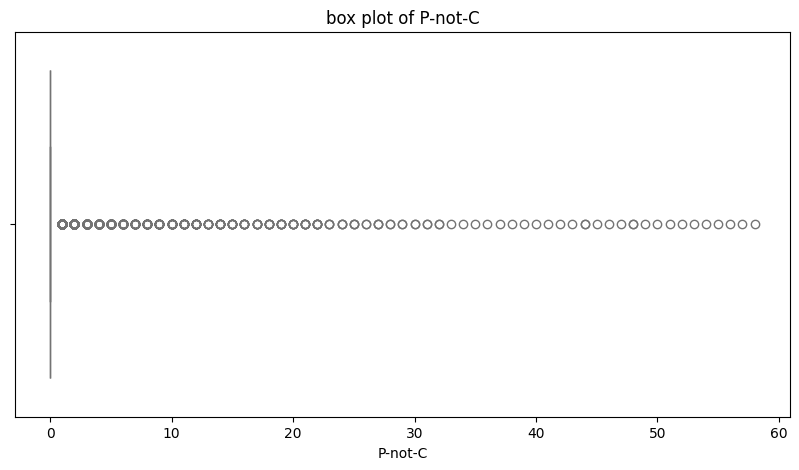

C:\Users\youss\AppData\Local\Temp\ipykernel_20620\3583508224.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[column], palette='rainbow', orient='h')


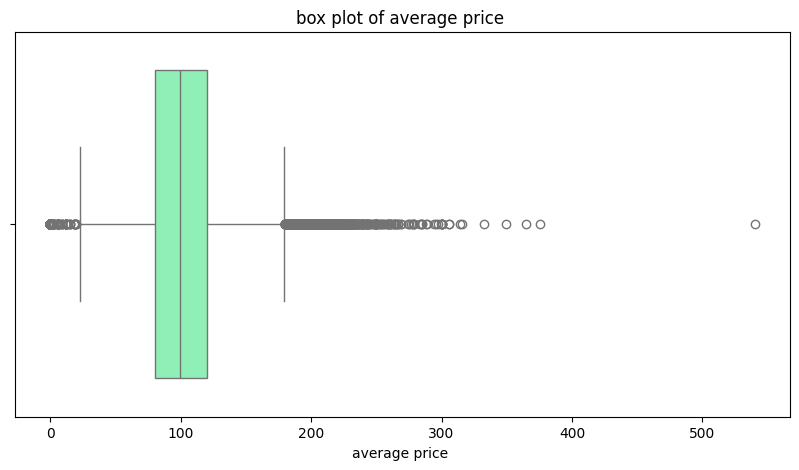

C:\Users\youss\AppData\Local\Temp\ipykernel_20620\3583508224.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[column], palette='rainbow', orient='h')


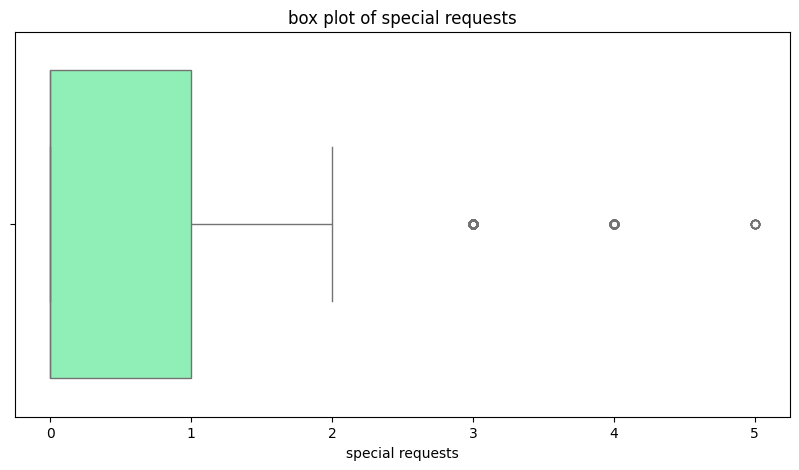

In [11]:
# Outlier Detection and Treatment (1/2):

# visualizing and handling outliers
# box plots to visualize outliers in numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

for column in numerical_columns:
    fig = plt.figure(figsize=(10,5))
    sns.boxplot(df[column], palette='rainbow', orient='h')
    plt.title('box plot of ' + column)
    plt.show()

In [12]:
# Outlier Detection and Treatment (2/2):

# removing outliers using a z-score function
# Calculate z-scores for all numerical columns
z_scores = np.abs(stats.zscore(df[numerical_columns]))

# Define threshold for outlier detection (e.g., z-score > 3)
threshold = 3

# Identify indices of outliers
outlier_indices = np.where(z_scores > threshold)

# Remove outliers (optional step, depending on your analysis)
df_no_outliers = df[(z_scores <= threshold).all(axis=1)]

# Display shape before and after removing outliers
print(f"Shape before removing outliers: {df.shape}")
print(f"Shape after removing outliers: {df_no_outliers.shape}")

Shape before removing outliers: (36285, 17)
Shape after removing outliers: (31883, 17)


C:\Users\youss\AppData\Local\Temp\ipykernel_20620\1732631052.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_no_outliers[column], palette='rainbow', orient='h')


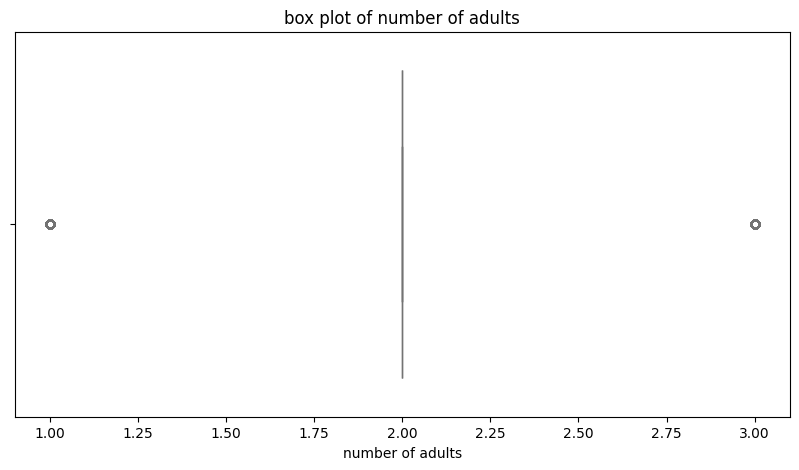

C:\Users\youss\AppData\Local\Temp\ipykernel_20620\1732631052.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_no_outliers[column], palette='rainbow', orient='h')


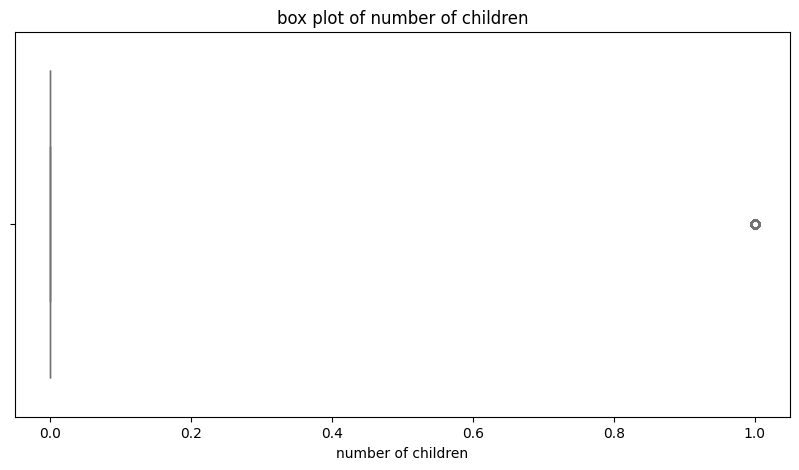

C:\Users\youss\AppData\Local\Temp\ipykernel_20620\1732631052.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_no_outliers[column], palette='rainbow', orient='h')


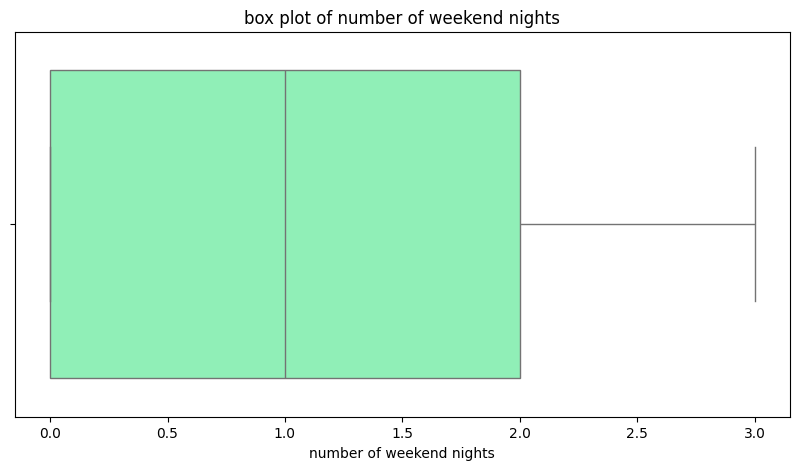

C:\Users\youss\AppData\Local\Temp\ipykernel_20620\1732631052.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_no_outliers[column], palette='rainbow', orient='h')


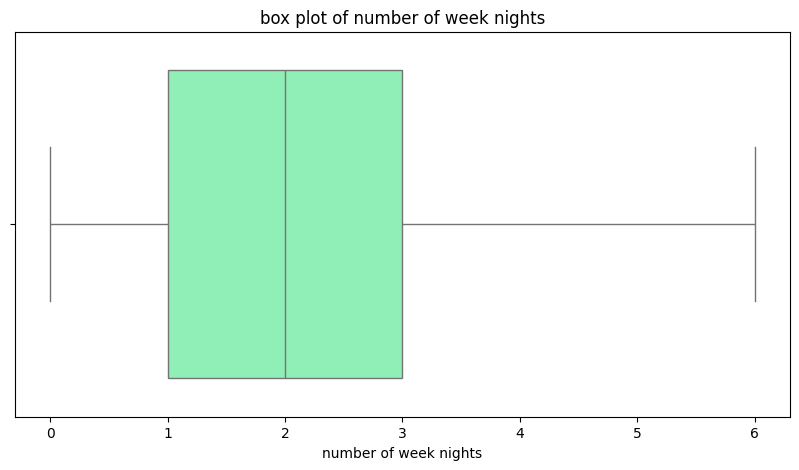

C:\Users\youss\AppData\Local\Temp\ipykernel_20620\1732631052.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_no_outliers[column], palette='rainbow', orient='h')


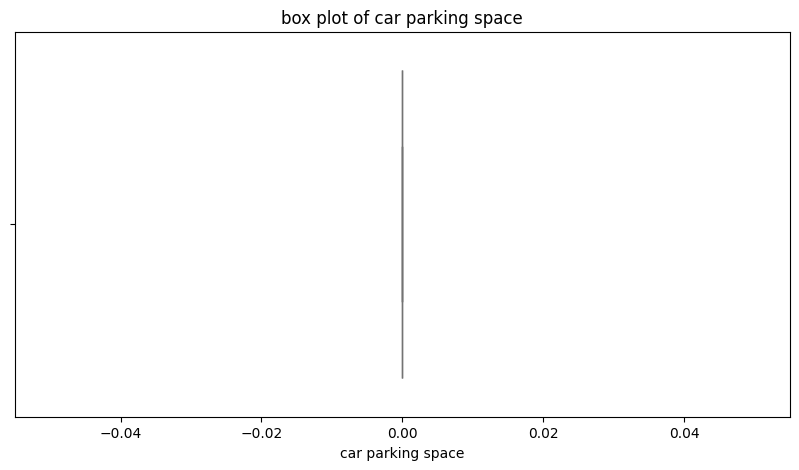

C:\Users\youss\AppData\Local\Temp\ipykernel_20620\1732631052.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_no_outliers[column], palette='rainbow', orient='h')


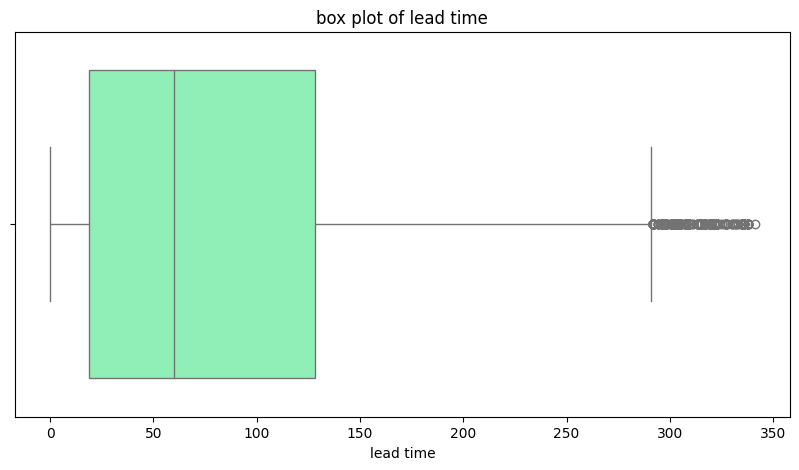

C:\Users\youss\AppData\Local\Temp\ipykernel_20620\1732631052.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_no_outliers[column], palette='rainbow', orient='h')


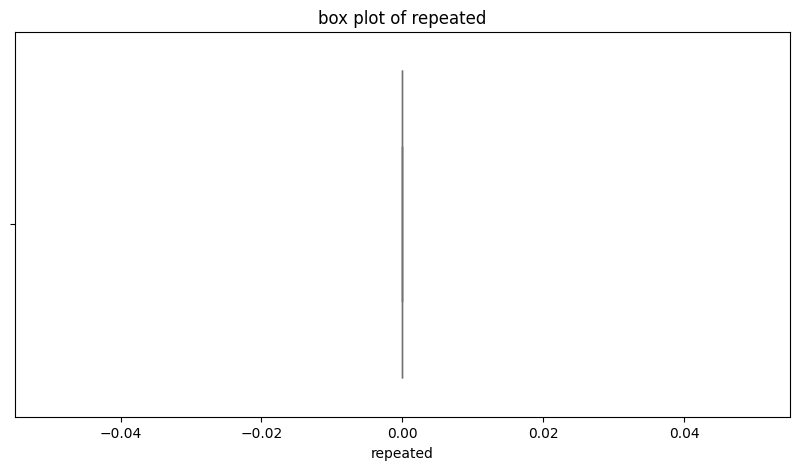

C:\Users\youss\AppData\Local\Temp\ipykernel_20620\1732631052.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_no_outliers[column], palette='rainbow', orient='h')


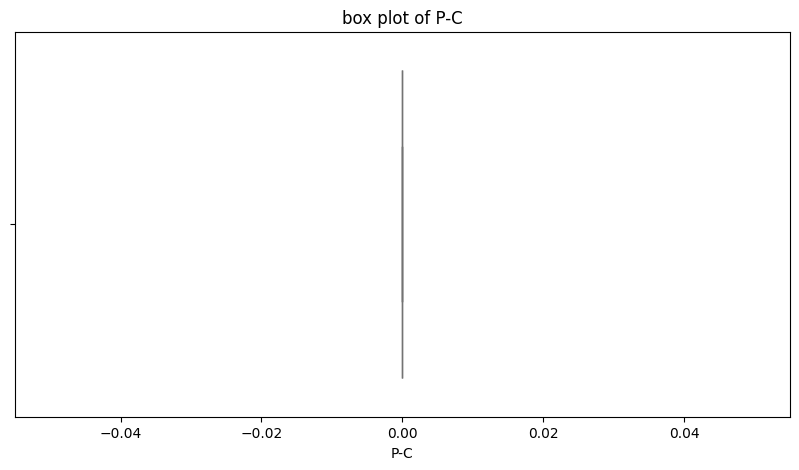

C:\Users\youss\AppData\Local\Temp\ipykernel_20620\1732631052.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_no_outliers[column], palette='rainbow', orient='h')


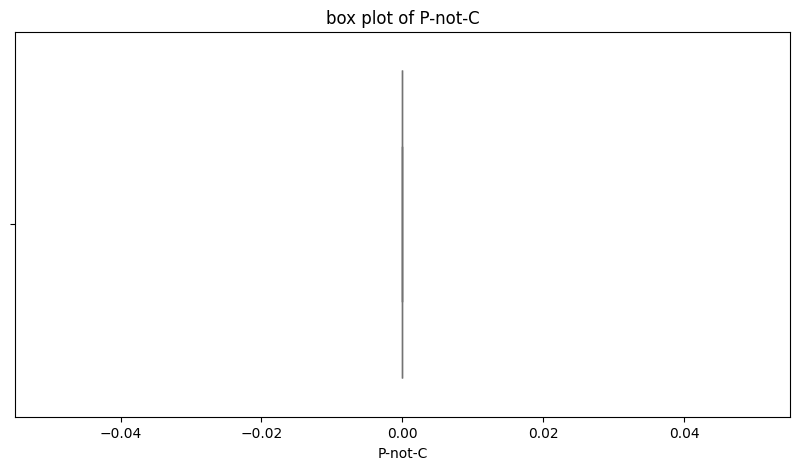

C:\Users\youss\AppData\Local\Temp\ipykernel_20620\1732631052.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_no_outliers[column], palette='rainbow', orient='h')


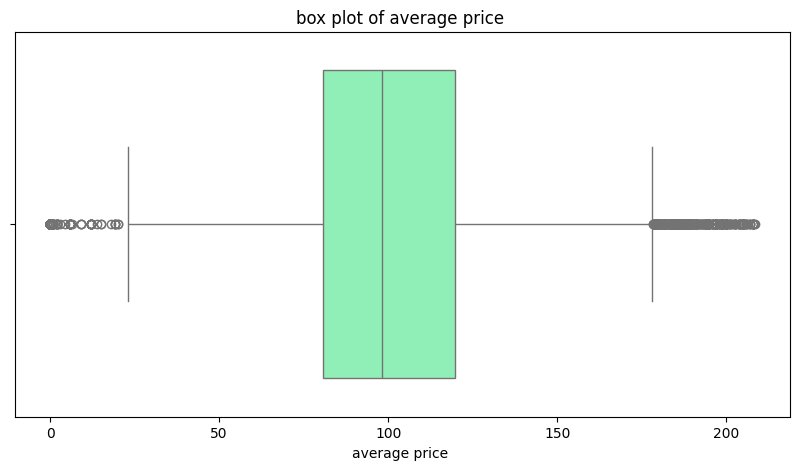

C:\Users\youss\AppData\Local\Temp\ipykernel_20620\1732631052.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_no_outliers[column], palette='rainbow', orient='h')


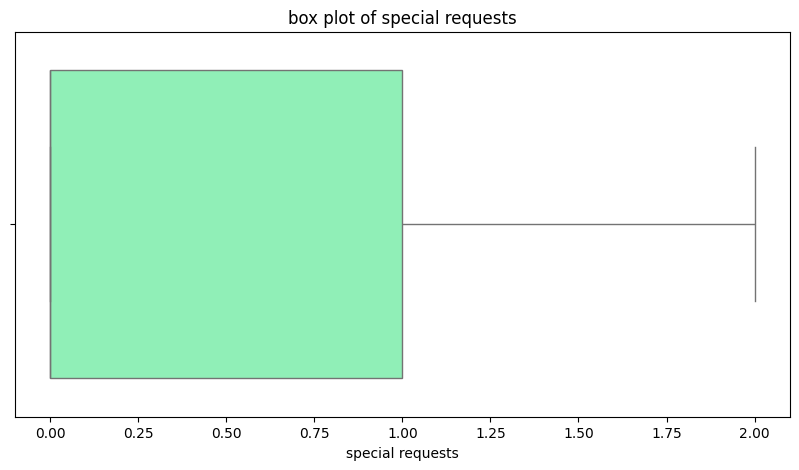

In [14]:
# box plots after outliers removal
numerical_columns = df.select_dtypes(include=['number']).columns

for column in numerical_columns:
    fig = plt.figure(figsize=(10,5))
    sns.boxplot(df_no_outliers[column], palette='rainbow', orient='h')
    plt.title('box plot of ' + column)
    plt.show()

In [15]:
# data visualization (1/3):

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [16]:
# Converting non-integer values to integers to apply colleration matrix
import matplotlib.pyplot as plt

# Remove the 'INN' part from the entries
df['Booking_ID'] = df['Booking_ID'].str.replace('INN', '')

# Convert the 'Booking_ID' column to numeric
df['Booking_ID'] = pd.to_numeric(df['Booking_ID'], errors='coerce')
# Compute the correlation matrix

# Remove the 'Meal Plan ' part from the entries
df['type of meal'] = df['type of meal'].str.replace('Meal Plan ', '')

# Convert the 'type of meal' column to numeric
df['type of meal'] = pd.to_numeric(df['type of meal'], errors='coerce')
# Compute the correlation matrix

# Remove the 'Room_Type ' part from the entries
df['room type'] = df['room type'].str.replace('Room_Type ', '')

# Convert the 'room type' column to numeric
df['room type'] = pd.to_numeric(df['room type'], errors='coerce')
# Compute the correlation matrix

1.Booking_ID (identifier, not useful for correlation)

2.Type of meal (categorical)

3.Car parking space (binary categorical, could be encoded)

4.Room type (categorical)

5.Market segment type (categorical)

6.Repeated (binary categorical, could be encoded)

7.Booking status (target variable, should be excluded for correlation but used for predictive modeling)

In [17]:
df.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

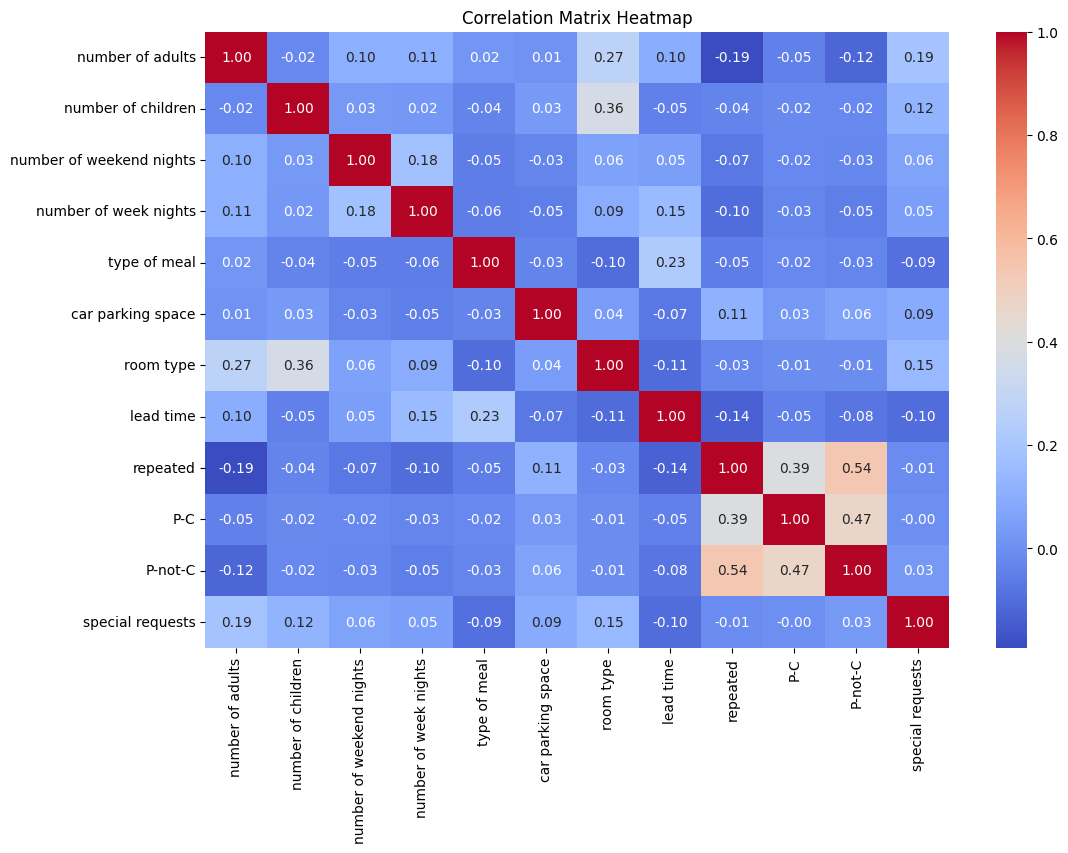

In [18]:
# apply colleration matrix on selected features

# List of columns to include in the correlation matrix:
selected_columns = [
    'number of adults',
    'number of children',
    'number of weekend nights',
    'number of week nights',
    'type of meal',
    'car parking space',
    'room type',
    'lead time',
    'repeated',
    'P-C',
    'P-not-C',
    'special requests',
]

# Compute the correlation matrix for selected columns
correlation_matrix = df[selected_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [19]:
##df['booking status'] = df['booking status'].str.replace('_', ' ', regex=False)

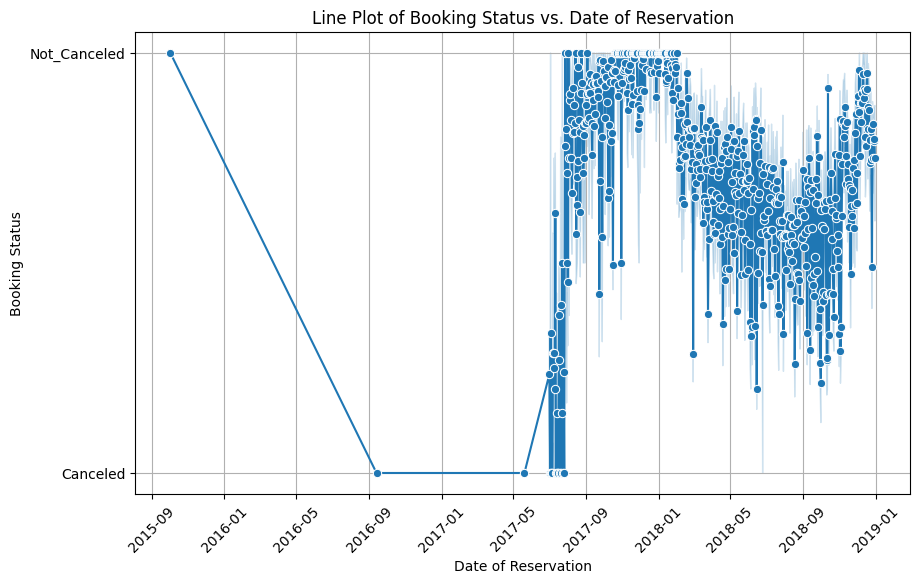

In [20]:
# data visualization (2/3):
# barplot for booking status based on date of reservation

## Convert 'date_of_reservation' to datetime format
##df['date of reservation'] = pd.to_datetime(df['date of reservation'])

# Convert 'date_of_reservation' to datetime format, using errors='coerce' to handle invalid dates
df['date of reservation'] = pd.to_datetime(df['date of reservation'], errors='coerce')

# Create a line plot for booking status over date of reservation
plt.figure(figsize=(10, 6))
sns.lineplot(x='date of reservation', y='booking status', data=df, marker='o')
plt.title('Line Plot of Booking Status vs. Date of Reservation')
plt.xlabel('Date of Reservation')
plt.ylabel('Booking Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add a grid for better readability
plt.show()

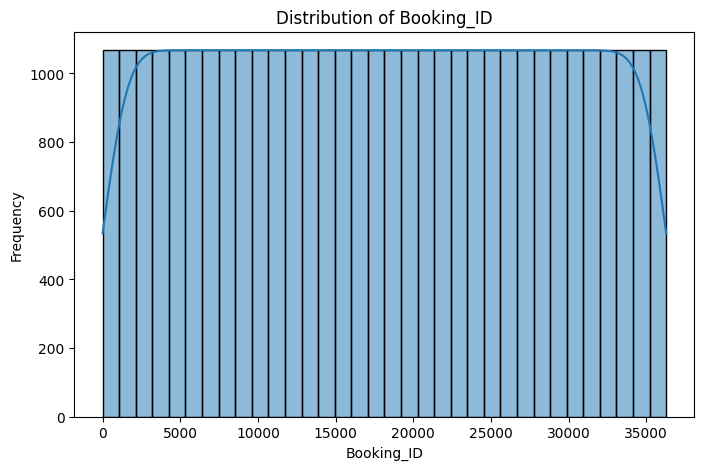

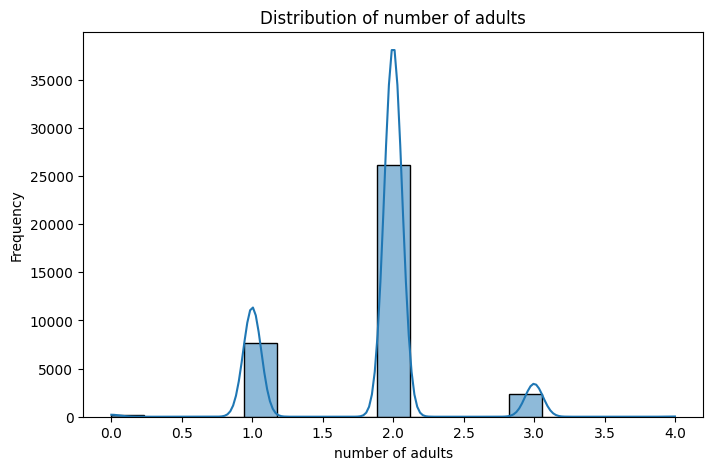

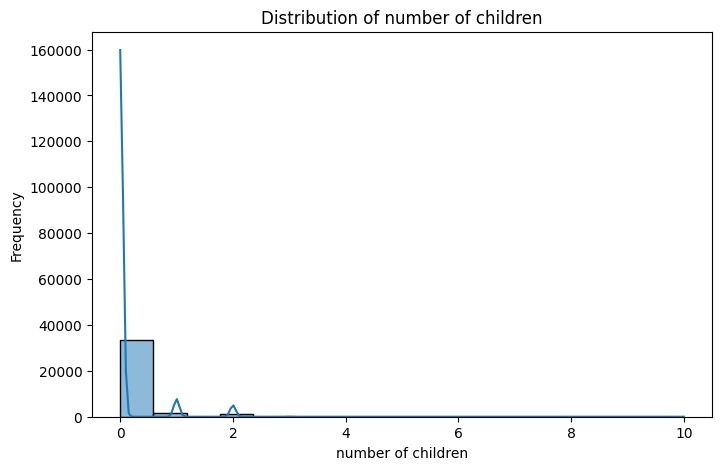

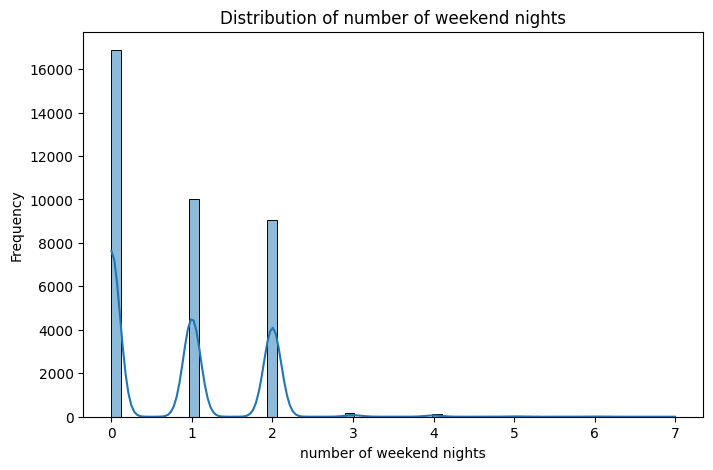

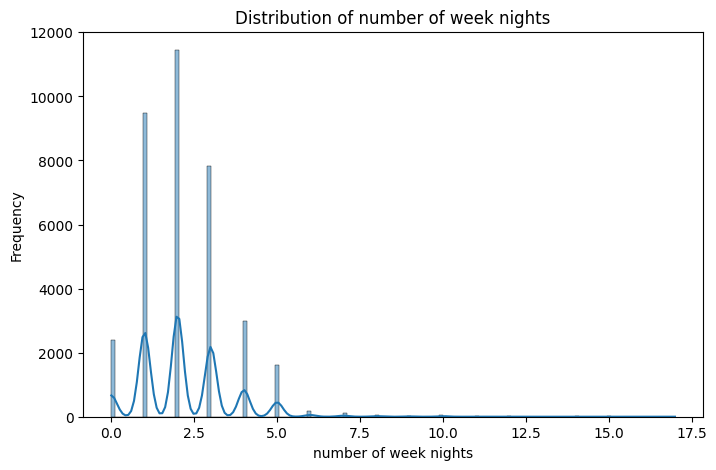

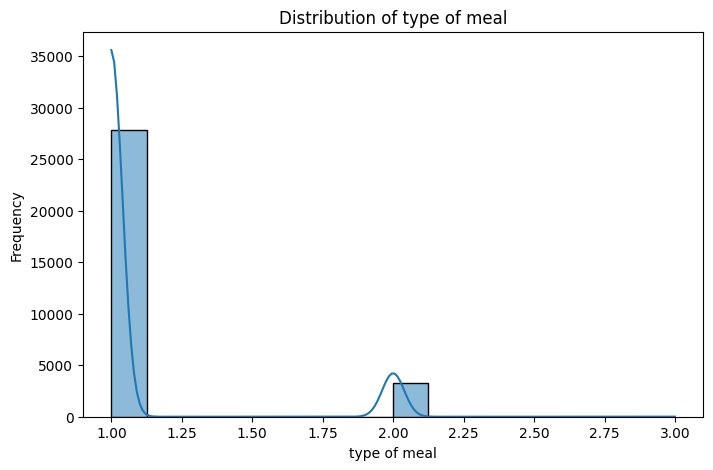

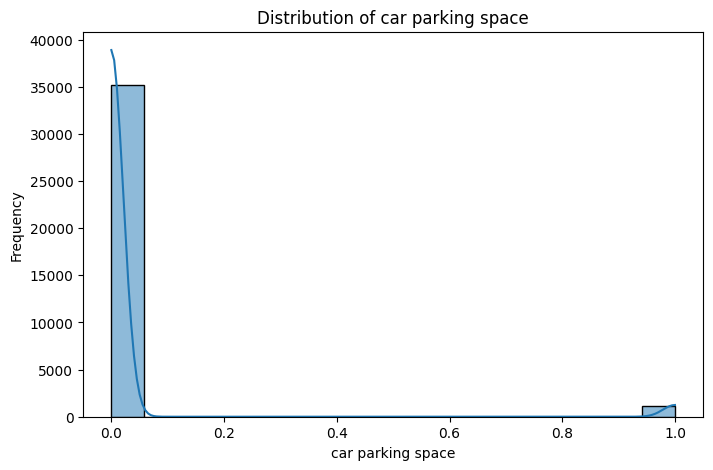

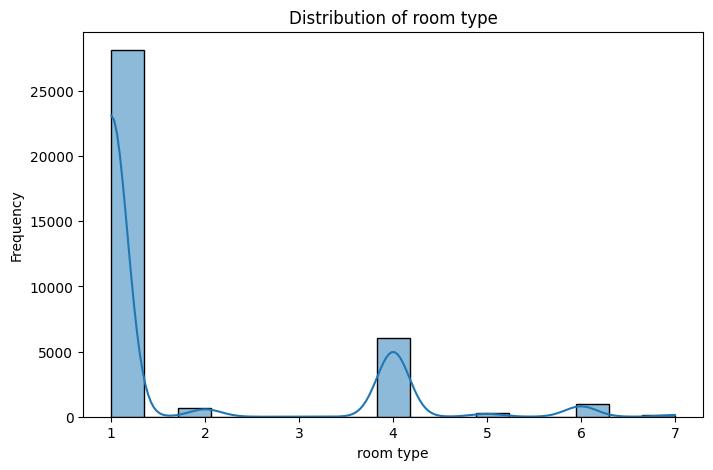

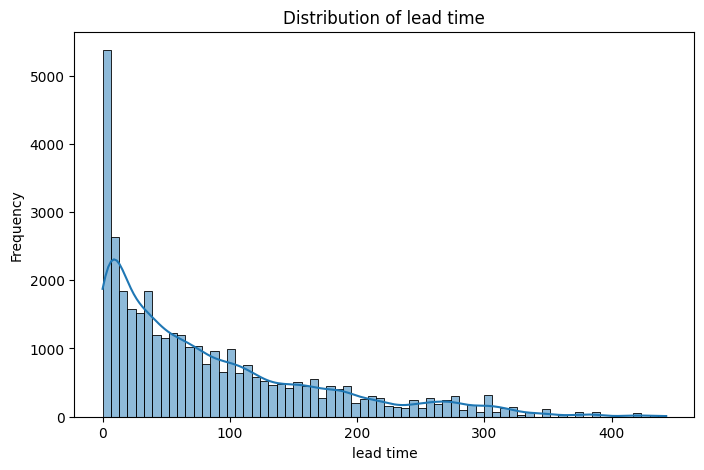

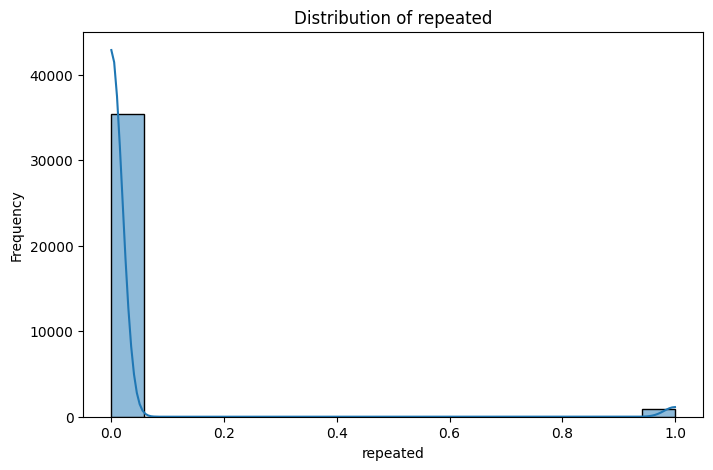

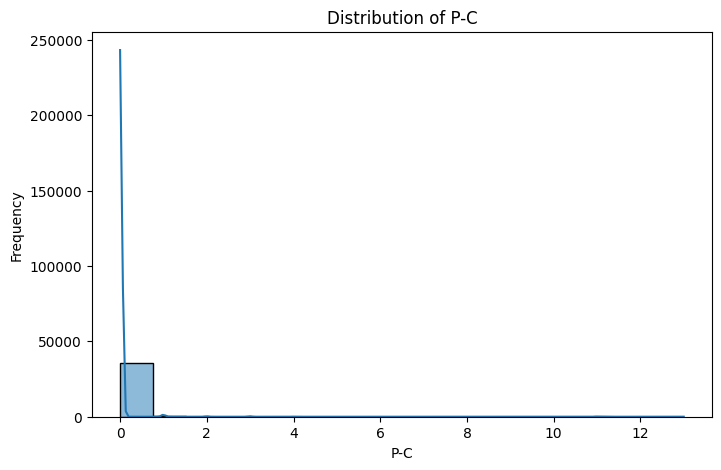

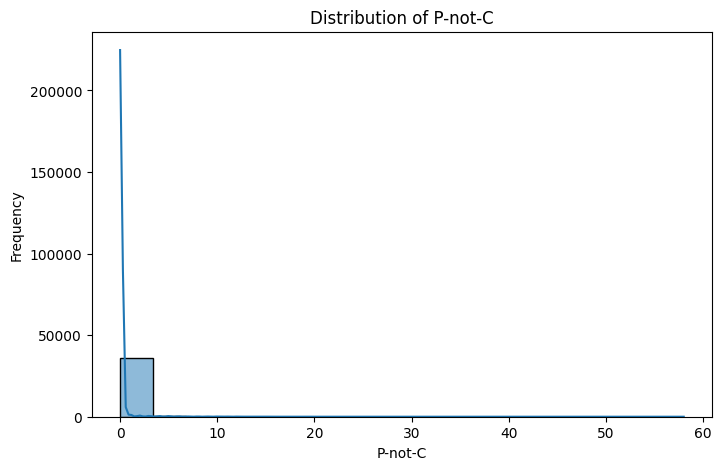

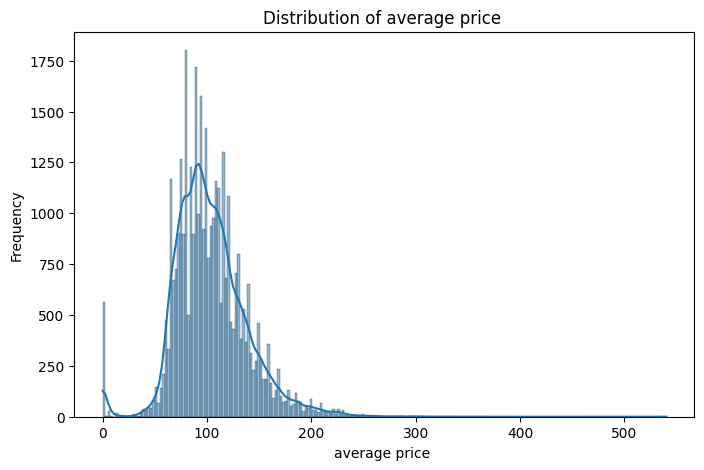

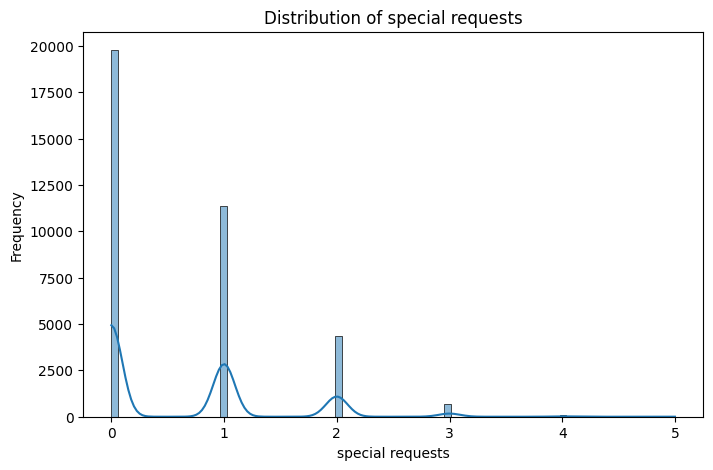

In [21]:
# data visualization (3/3)
  # Histogram for numerical variables
numerical_columns = df.select_dtypes(include=['number']).columns

for column in numerical_columns:
      plt.figure(figsize=(8, 5))
      sns.histplot(df[column], kde=True)
      plt.title(f'Distribution of {column}')
      plt.xlabel(column)
      plt.ylabel('Frequency')
      plt.show()


In [22]:
def cross_tab_plot(data, column_1, column_2):
  fig, axes = plt.subplots(1, 2, figsize=(10, 4))

  # Bar plot for values
  cross_tab = pd.crosstab(data[column_1], data[column_2])
  cross_tab.plot(kind='bar', ax=axes[0])
  # cross_tab.plot(kind='bar', stacked=True, ax=axes[0])
  axes[0].set_title('Values')

  # Bar plot for percentage
  cross_tab_percent = cross_tab.apply(lambda x: x / x.sum() * 100, axis=1)
  cross_tab_percent.plot(kind='bar', ax=axes[1])
  axes[1].set_title('Percentage')

In [23]:
df['is_family'] = (df['number of adults'] + df['number of children']) > 2

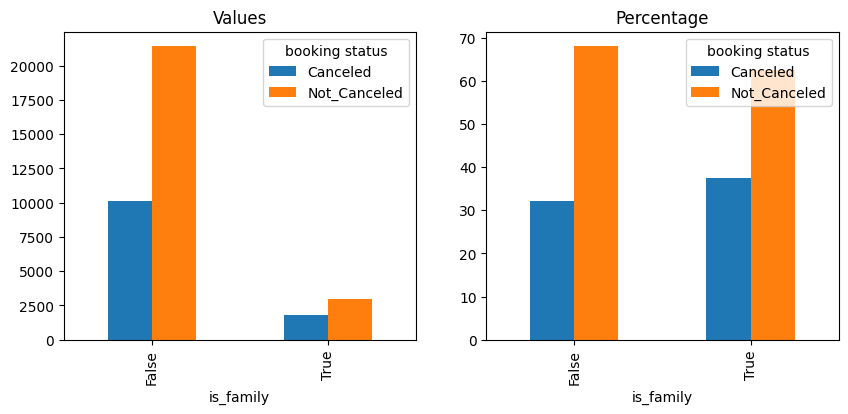

In [24]:
cross_tab_plot(df, 'is_family', 'booking status')

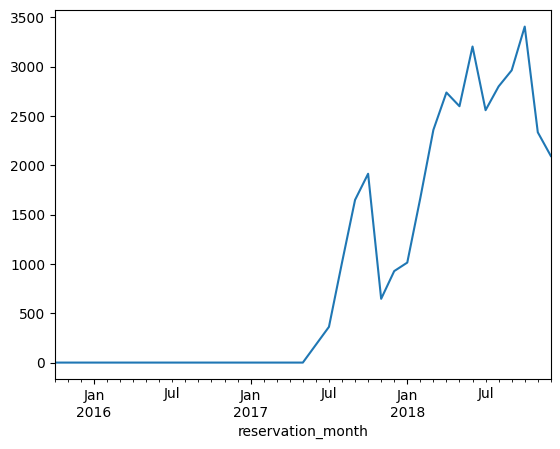

In [44]:
# Time series analysis: Trend of bookings over time

# Convert the 'date of reservation' column to period format
df['reservation_month'] = pd.to_datetime(df['date of reservation'], format='%Y-%m').dt.to_period('M')
monthly_bookings = df.groupby('reservation_month').size()
monthly_bookings.plot(kind='line')
plt.show()



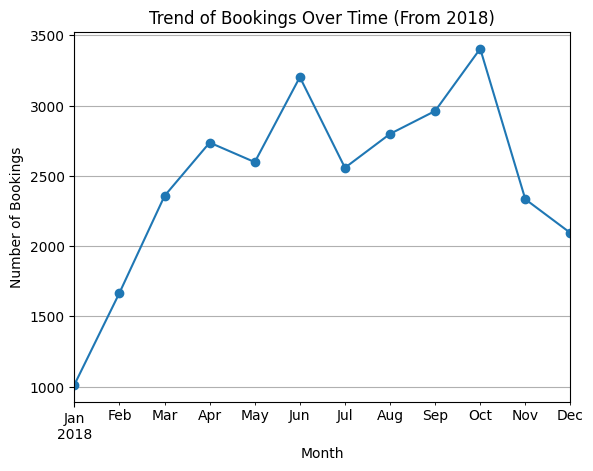

In [45]:
# Filter the data to start from January 2018
start_period = pd.Period('2018-01', freq='M')
filtered_df = df[df['reservation_month'] >= start_period]

# Group by reservation month and count bookings
monthly_bookings = filtered_df.groupby('reservation_month').size()

# Plot the trend
monthly_bookings.plot(kind='line', marker='o')
plt.title('Trend of Bookings Over Time (From 2018)')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.show()

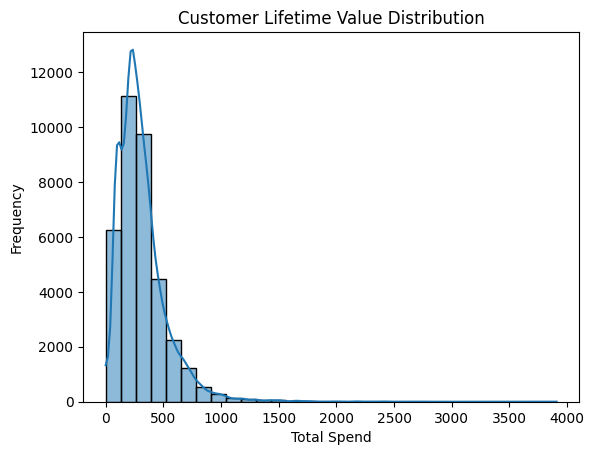

In [ ]:
# Calculate total spend and booking frequency 
df['total_spend'] = df['average price '] * (df['number of weekend nights'] + df['number of week nights'])
customer_clv = df.groupby('Booking_ID')['total_spend'].sum().reset_index()

# Visualize CLV distribution
sns.histplot(customer_clv['total_spend'], bins=30, kde=True)
plt.title('Customer Lifetime Value Distribution')
plt.xlabel('Total Spend')
plt.ylabel('Frequency')
plt.show()

In [47]:
# Calculate total number of bookings
total_bookings = len(df)

# Calculate the count of each booking status
status_counts = df['booking status'].value_counts()

# Calculate conversion rates
conversion_rates = status_counts / total_bookings

# Display the conversion rates
print("Conversion Rates:")
print(conversion_rates)

Conversion Rates:
booking status
Not_Canceled    0.672344
Canceled        0.327656
Name: count, dtype: float64
